# 🩺 HEALTHCARE ANALYTICS
----
## 📊 MediInsights: Exploratory Data Analysis of Hospital Records
**EDA:** Exploratory Data Analysis (EDA) is the process of investigating datasets by analyzing their key characteristics using statistical summaries, graphical representations, and data profiling techniques to uncover patterns, detect anomalies, and form hypotheses for further analysis.

### Introduction


This notebook begins with a descriptive exploration of the patient and hospital datasets using summary statistics and visual analysis. It then examines patterns in patient demographics, admission types, and medical conditions to understand what factors may influence hospital stay duration. Finally, relationships between variables such as department, billing, and severity of illness are analyzed further. Key findings and insights are documented in the accompanying README file.


### 1. 🔧 Preliminaries 
**Importing the necessary Python libraries** for data manipulation, analysis, and visualization. Set up the plotting environment using **matplotlib and seaborn** to ensure consistent styling and clear visual output throughout the notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. 📥 Loading the Data 
Load the hospital-related datasets into DataFrames and preview the first and last few rows to understand their structure and contents.

In [3]:
# Loading each sheet into a separate DataFrame
patients_details_df = pd.read_excel(r"https://raw.githubusercontent.com/jasminshaik15/Visual-Healthcare-Insights-Python-EDA-Power-BI-Dashboards/main/data/healthcare_dataset.xlsx", sheet_name='patients_details')
hospital_details_df = pd.read_excel(r"https://raw.githubusercontent.com/jasminshaik15/Visual-Healthcare-Insights-Python-EDA-Power-BI-Dashboards/main/data/healthcare_dataset.xlsx", sheet_name='hospital_details')
doctor_details_df = pd.read_excel(r"https://raw.githubusercontent.com/jasminshaik15/Visual-Healthcare-Insights-Python-EDA-Power-BI-Dashboards/main/data/healthcare_dataset.xlsx", sheet_name='doctor_details')
patients_data_df = pd.read_excel(r"https://raw.githubusercontent.com/jasminshaik15/Visual-Healthcare-Insights-Python-EDA-Power-BI-Dashboards/main/data/healthcare_dataset.xlsx", sheet_name='patients_data')

# Previewing the data
print("Patients Details:\n", patients_details_df.head())
print("Hospital Details:\n", hospital_details_df.head())
print("Doctor Details:\n", doctor_details_df.head())
print("Patients Data:\n", patients_data_df.head())
print("Patients Data:\n", patients_data_df.tail())

Patients Details:
    Pid               Name   Age  Gender Blood Type
0    1        aAroN ADaMS  38.0  Female         O-
1    2      aAROn aguIRRe  36.0    Male         A-
2    3     AArOn AnderSoN  50.0  Female         A+
3    4  aaRON AndeRSoN md  20.0  Female         A-
4    5       AAron ArCHER   NaN  Female         B-
Hospital Details:
    Hid                       Hospital
0    1  Abbott and Thompson, Sullivan
1    2                     Abbott Inc
2    3                     Abbott Ltd
3    4     Abbott Moore and Williams,
4    5     Abbott, Peters and Hoffman
Doctor Details:
    Did           Doctor
0    1    Aaron Acevedo
1    2      Aaron Adams
2    3    Aaron Aguilar
3    4  Aaron Alexander
4    5   Aaron Anderson
Patients Data:
    Pid    Did    Hid Medical Condition Date of Admission Insurance Provider  \
0  1.0  30256  16666            Cancer        2021-03-10   UnitedHealthcare   
1  2.0  21581  26920          Diabetes        2023-02-26   UnitedHealthcare   
2  3.0  22170 

### 3. 🔍 Data Cleaning & Preparation
----
### a) 🔗 Merging All Datasets

To perform a complete analysis, we **merge all four datasets using their respective key columns (Pid, Hid, Did).** This helps consolidate patient_details, hospital_details, doctor_details, and patients_data into a single unified DataFrame for further exploration and visualization.

In [4]:
# Merging patients_data with patients_details on Pid
merged_df = pd.merge(patients_data_df, patients_details_df, on='Pid', how='left')

# Merging with doctor_details on Did
merged_df = pd.merge(merged_df, doctor_details_df, on='Did', how='left')

# Merging with hospital_details on Hid
merged_df = pd.merge(merged_df, hospital_details_df, on='Hid', how='left')

merged_df.head()


,Pid,Did,Hid,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Name,Age,Gender,Blood Type,Doctor,Hospital
0,1.0,30256,16666,Cancer,2021-03-10,UnitedHealthcare,26052.106404,363,Elective,2021-03-29,Lipitor,Inconclusive,aAroN ADaMS,38.0,Female,O-,Norma Li,Hart LLC
1,2.0,21581,26920,Diabetes,2023-02-26,UnitedHealthcare,27087.560553,300,Emergency,2023-03-13,Aspirin,NaN,aAROn aguIRRe,36.0,Male,A-,Katrina Luna,Murray-Shelton
2,3.0,22170,35639,Asthma,2020-12-18,Cigna,39804.658624,196,Urgent,2021-01-15,Aspirin,Inconclusive,AArOn AnderSoN,50.0,Female,A+,Kenneth Jennings,Tanner-Cox
3,4.0,36870,31042,Hypertension,2021-03-28,UnitedHealthcare,16846.415799,249,Elective,2021-04-09,Paracetamol,Abnormal,aaRON AndeRSoN md,20.0,Female,A-,Tammy Perez,Ritter LLC
4,5.0,9015,25936,Cancer,2021-01-10,Medicare,10602.077185,108,Urgent,2021-01-17,Paracetamol,Inconclusive,AAron ArCHER,NaN,Female,B-,Cynthia Villanueva,"Montes Case and Mendez,"


In [5]:
# Checking the column names and data types
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55500 entries, 0 to 55499
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Pid                 55497 non-null  float64       
 1   Did                 55500 non-null  int64         
 2   Hid                 55500 non-null  int64         
 3   Medical Condition   55500 non-null  object        
 4   Date of Admission   55500 non-null  datetime64[ns]
 5   Insurance Provider  55500 non-null  object        
 6   Billing Amount      55500 non-null  float64       
 7   Room Number         55500 non-null  int64         
 8   Admission Type      55500 non-null  object        
 9   Discharge Date      55500 non-null  datetime64[ns]
 10  Medication          55500 non-null  object        
 11  Test Results        55492 non-null  object        
 12  Name                55497 non-null  object        
 13  Age                 55493 non-null  float64   

In [6]:
# summary of numerical columns
merged_df.describe(include = "all")

C:\Users\jasmi\AppData\Local\Temp\ipykernel_7140\1734731764.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  merged_df.describe(include = "all")
C:\Users\jasmi\AppData\Local\Temp\ipykernel_7140\1734731764.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  merged_df.describe(include = "all")


,Pid,Did,Hid,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Name,Age,Gender,Blood Type,Doctor,Hospital
count,55497.000000,55500.000000,55500.000000,55500,55500,55500,55500.000000,55500.000000,55500,55500,55500,55492,55497,55493.000000,55497,55497,55500,55500
unique,NaN,NaN,NaN,6,1827,5,NaN,NaN,3,1856,5,3,49974,NaN,2,8,40341,39876
top,NaN,NaN,NaN,Arthritis,2024-03-16 00:00:00,Cigna,NaN,NaN,Elective,2020-03-15 00:00:00,Lipitor,Abnormal,jAmeS DaViS,NaN,Male,A-,Michael Smith,LLC Smith
freq,NaN,NaN,NaN,9308,50,11249,NaN,NaN,18655,53,11140,18624,3,NaN,27773,6969,27,44
first,NaN,NaN,NaN,NaN,2019-05-08 00:00:00,NaN,NaN,NaN,NaN,2019-05-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2024-05-07 00:00:00,NaN,NaN,NaN,NaN,2024-06-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,27478.106979,20195.877604,20362.033892,NaN,NaN,NaN,25539.316097,301.134829,NaN,NaN,NaN,NaN,NaN,51.539041,NaN,NaN,NaN,NaN
std,15860.379707,11531.448639,11142.462206,NaN,NaN,NaN,14211.454431,115.243069,NaN,NaN,NaN,NaN,NaN,19.602661,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,NaN,NaN,NaN,-2008.492140,101.000000,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,NaN,NaN
25%,13731.000000,10152.750000,11108.750000,NaN,NaN,NaN,13241.224652,202.000000,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,NaN,NaN


In [7]:
merged_df.columns

Index(['Pid', 'Did', 'Hid', 'Medical Condition', 'Date of Admission',
       'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type',
       'Discharge Date', 'Medication', 'Test Results', 'Name', 'Age', 'Gender',
       'Blood Type', 'Doctor', 'Hospital'],
      dtype='object')

In [8]:
merged_df.dtypes

Pid                          float64
Did                            int64
Hid                            int64
Medical Condition             object
Date of Admission     datetime64[ns]
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
Name                          object
Age                          float64
Gender                        object
Blood Type                    object
Doctor                        object
Hospital                      object
dtype: object

In [9]:
# Checking for NaNs etc
merged_df.count()

Pid                   55497
Did                   55500
Hid                   55500
Medical Condition     55500
Date of Admission     55500
Insurance Provider    55500
Billing Amount        55500
Room Number           55500
Admission Type        55500
Discharge Date        55500
Medication            55500
Test Results          55492
Name                  55497
Age                   55493
Gender                55497
Blood Type            55497
Doctor                55500
Hospital              55500
dtype: int64

### b)🧾 Standardizing Name Fields & removing duplicates in Merged Data

After merging all datasets, we ensure the Name, Doctor, and Hospital columns are clean and consistently formatted. This helps eliminate redundancy, avoids mismatched values, and improves overall data quality for analysis and visualization.


In [10]:
#  .strip(): Removes leading and trailing whitespace from each string.
#  .title(): Converts each word in the string to title case: the first letter is capitalized, and the rest are lowercase.

merged_df['Name'] = merged_df['Name'].str.strip().str.title()
merged_df['Hospital'] = merged_df['Hospital'].str.strip().str.title()
merged_df['Doctor'] = merged_df['Doctor'].str.strip().str.title()
merged_df



,Pid,Did,Hid,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Name,Age,Gender,Blood Type,Doctor,Hospital
0,1.0,30256,16666,Cancer,2021-03-10,UnitedHealthcare,26052.106404,363,Elective,2021-03-29,Lipitor,Inconclusive,Aaron Adams,38.0,Female,O-,Norma Li,Hart Llc
1,2.0,21581,26920,Diabetes,2023-02-26,UnitedHealthcare,27087.560553,300,Emergency,2023-03-13,Aspirin,NaN,Aaron Aguirre,36.0,Male,A-,Katrina Luna,Murray-Shelton
2,3.0,22170,35639,Asthma,2020-12-18,Cigna,39804.658624,196,Urgent,2021-01-15,Aspirin,Inconclusive,Aaron Anderson,50.0,Female,A+,Kenneth Jennings,Tanner-Cox
3,4.0,36870,31042,Hypertension,2021-03-28,UnitedHealthcare,16846.415799,249,Elective,2021-04-09,Paracetamol,Abnormal,Aaron Anderson Md,20.0,Female,A-,Tammy Perez,Ritter Llc
4,5.0,9015,25936,Cancer,2021-01-10,Medicare,10602.077185,108,Urgent,2021-01-17,Paracetamol,Inconclusive,Aaron Archer,NaN,Female,B-,Cynthia Villanueva,"Montes Case And Mendez,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,54941.0,2127,20144,Asthma,2021-07-25,Aetna,16668.258866,476,Urgent,2021-07-30,Aspirin,Inconclusive,Zoe Jackson,38.0,Male,A-,Andrew Hall,Jones Plc
55496,54942.0,9999,20132,Cancer,2024-03-22,Medicare,9024.092301,178,Elective,2024-04-08,Penicillin,Inconclusive,Zoe Rodriguez,53.0,Female,O+,David Keller,Jones Ltd
55497,54942.0,9999,20132,Cancer,2024-03-22,Medicare,9024.092301,178,Elective,2024-04-08,Penicillin,Inconclusive,Zoe Rodriguez,53.0,Female,O+,David Keller,Jones Ltd
55498,54943.0,26092,18852,Obesity,2022-02-24,Aetna,33252.225130,272,Emergency,2022-03-15,Penicillin,Inconclusive,Zoe Smith,36.0,Male,AB-,Mary Bates,Inc Morales


###  c) 🔍Data Integrity Validation for Foreign Keys (Pid, Did, Hid)
Identifying Mismatches and Foreign Key Issues Between Pid, Did, and Hid in Merged Data and Master Tables

In [11]:
invalid_pids = merged_df[merged_df['Pid'].isin(~patients_details_df['Pid'])]
print("Invalid_pids:", invalid_pids)
invalid_dids = merged_df[merged_df['Did'].isin(~doctor_details_df['Did'])]
print("invalid_dids:", invalid_dids)
invalid_hids = merged_df[merged_df['Hid'].isin(~hospital_details_df['Hid'])]
print("invalid_hids:", invalid_hids)

Invalid_pids: Empty DataFrame
Columns: [Pid, Did, Hid, Medical Condition, Date of Admission, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results, Name, Age, Gender, Blood Type, Doctor, Hospital]
Index: []
invalid_dids: Empty DataFrame
Columns: [Pid, Did, Hid, Medical Condition, Date of Admission, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results, Name, Age, Gender, Blood Type, Doctor, Hospital]
Index: []
invalid_hids: Empty DataFrame
Columns: [Pid, Did, Hid, Medical Condition, Date of Admission, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results, Name, Age, Gender, Blood Type, Doctor, Hospital]
Index: []


### d) 🔍 Handling Missing Values
**Identify and appropriately handle missing values in the dataset** to prevent incomplete analysis or errors during visualization.


In [12]:
# 1. Summary of missing values
print("Missing Values Summary:\n", merged_df.isnull().sum())

Missing Values Summary:
 Pid                   3
Did                   0
Hid                   0
Medical Condition     0
Date of Admission     0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          8
Name                  3
Age                   7
Gender                3
Blood Type            3
Doctor                0
Hospital              0
dtype: int64


In [13]:
# 2. Dropping rows where essential patient info is missing (e.g., Patient ID)
df = merged_df.dropna(subset=['Pid'])
df.isnull().sum()

Pid                   0
Did                   0
Hid                   0
Medical Condition     0
Date of Admission     0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          8
Name                  0
Age                   4
Gender                0
Blood Type            0
Doctor                0
Hospital              0
dtype: int64

In [14]:
# 3. Filling missing numerical values (e.g.,age) with median
df['Age'] = df['Age'].fillna(df['Age'].median())
df.isnull().sum()

C:\Users\jasmi\AppData\Local\Temp\ipykernel_7140\3000432710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].fillna(df['Age'].median())


Pid                   0
Did                   0
Hid                   0
Medical Condition     0
Date of Admission     0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          8
Name                  0
Age                   0
Gender                0
Blood Type            0
Doctor                0
Hospital              0
dtype: int64

In [15]:
# 4. Filling missing categorical values (e.g., Test Results) with mode
df['Test Results'] = df['Test Results'].fillna(df['Test Results'].mode()[0])
df.isnull().sum()

C:\Users\jasmi\AppData\Local\Temp\ipykernel_7140\4108608620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Test Results'] = df['Test Results'].fillna(df['Test Results'].mode()[0])


Pid                   0
Did                   0
Hid                   0
Medical Condition     0
Date of Admission     0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
Name                  0
Age                   0
Gender                0
Blood Type            0
Doctor                0
Hospital              0
dtype: int64

### e) 🔍 Handling Duplicate Records
**Identify and appropriately handle missing values in the dataset** to prevent incomplete analysis or errors during visualization.

In [16]:

# 1. Checking for duplicates 
dup_cnt = df.duplicated().sum()
print("duplicate rows count: ", dup_cnt)
print("all rows count:\n", df.count())

duplicate rows count:  534
all rows count:
 Pid                   55497
Did                   55497
Hid                   55497
Medical Condition     55497
Date of Admission     55497
Insurance Provider    55497
Billing Amount        55497
Room Number           55497
Admission Type        55497
Discharge Date        55497
Medication            55497
Test Results          55497
Name                  55497
Age                   55497
Gender                55497
Blood Type            55497
Doctor                55497
Hospital              55497
dtype: int64


In [17]:
# 2. View duplicate rows
duplicates = df[df.duplicated()]
duplicates

,Pid,Did,Hid,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Name,Age,Gender,Blood Type,Doctor,Hospital
226,226.0,12193,26200,Hypertension,2022-12-15,UnitedHealthcare,1983.568297,192,Elective,2023-01-13,Ibuprofen,Normal,Abigail Young,41.0,Female,O+,Edward Kramer,Moore-Mcdaniel
376,375.0,4152,32496,Hypertension,2022-01-02,Cigna,16294.907725,180,Urgent,2022-01-30,Ibuprofen,Normal,Adam Thomas,75.0,Male,O+,Beverly Miller,Sanchez-Wilson
609,607.0,13634,33309,Diabetes,2022-03-27,Aetna,39525.674902,246,Emergency,2022-04-21,Aspirin,Normal,Alex Black,51.0,Male,O+,Frank Williams,Short And Sons
874,871.0,11324,5130,Arthritis,2024-01-17,UnitedHealthcare,4177.715918,450,Urgent,2024-02-15,Penicillin,Normal,Alexandra Santiago,53.0,Male,B-,Donald Solis,"And White, Wall Hurst"
1023,1019.0,24223,11717,Diabetes,2023-12-24,Aetna,1903.879223,385,Elective,2024-01-04,Paracetamol,Inconclusive,Alfred Cervantes,65.0,Male,AB-,Linda Hall,Dorsey Ltd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55047,54496.0,39216,6802,Asthma,2019-12-11,Medicare,24502.672173,496,Elective,2019-12-12,Paracetamol,Inconclusive,William Savage,30.0,Female,O-,Veronica Smith,Bennett-Brooks
55190,54638.0,24824,32763,Arthritis,2019-08-16,Medicare,32612.697020,304,Elective,2019-09-02,Paracetamol,Normal,Willie Schwartz,49.0,Female,A-,Lori Hughes,Schmidt-Ford
55194,54641.0,36495,35426,Arthritis,2023-07-25,Aetna,29898.351551,451,Emergency,2023-08-04,Penicillin,Abnormal,Willie Small,67.0,Female,A+,Susan Gordon,Stone-West
55330,54776.0,26414,3269,Diabetes,2020-04-25,Blue Cross,15207.547262,202,Emergency,2020-05-25,Penicillin,Inconclusive,Zachary Ball,85.0,Female,B-,Matthew Conley,"And Morgan Jones, Matthews"


In [18]:
# 3. Droping duplicate rows
df = df.drop_duplicates()
df.count()

Pid                   54963
Did                   54963
Hid                   54963
Medical Condition     54963
Date of Admission     54963
Insurance Provider    54963
Billing Amount        54963
Room Number           54963
Admission Type        54963
Discharge Date        54963
Medication            54963
Test Results          54963
Name                  54963
Age                   54963
Gender                54963
Blood Type            54963
Doctor                54963
Hospital              54963
dtype: int64

In [19]:
# 4. Dropping based on a specific subset (e.g., Pid, Date of Admission)
df1 = df.drop_duplicates(subset=['Pid', 'Date of Admission'])
df1.count()

Pid                   54963
Did                   54963
Hid                   54963
Medical Condition     54963
Date of Admission     54963
Insurance Provider    54963
Billing Amount        54963
Room Number           54963
Admission Type        54963
Discharge Date        54963
Medication            54963
Test Results          54963
Name                  54963
Age                   54963
Gender                54963
Blood Type            54963
Doctor                54963
Hospital              54963
dtype: int64

In [20]:
# 5. Confirm cleanup
print(f"Data shape after removing duplicates: {df.shape}")

Data shape after removing duplicates: (54963, 18)


### f) 🔍 Converting Data Types
Ensure columns like dates, amounts, ids & age have **correct data types** for analysis.

In [21]:
df.dtypes

Pid                          float64
Did                            int64
Hid                            int64
Medical Condition             object
Date of Admission     datetime64[ns]
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
Name                          object
Age                          float64
Gender                        object
Blood Type                    object
Doctor                        object
Hospital                      object
dtype: object

In [22]:
# 1. Converting Date of Admission & Discharge Date to datetime format
#df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], errors='coerce').dt.strftime('%d-%m-%Y')
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'],errors='coerce')
#df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], errors='coerce').dt.strftime('%d-%m-%Y')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'],errors='coerce')
df

,Pid,Did,Hid,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Name,Age,Gender,Blood Type,Doctor,Hospital
0,1.0,30256,16666,Cancer,2021-03-10,UnitedHealthcare,26052.106404,363,Elective,2021-03-29,Lipitor,Inconclusive,Aaron Adams,38.0,Female,O-,Norma Li,Hart Llc
1,2.0,21581,26920,Diabetes,2023-02-26,UnitedHealthcare,27087.560553,300,Emergency,2023-03-13,Aspirin,Abnormal,Aaron Aguirre,36.0,Male,A-,Katrina Luna,Murray-Shelton
2,3.0,22170,35639,Asthma,2020-12-18,Cigna,39804.658624,196,Urgent,2021-01-15,Aspirin,Inconclusive,Aaron Anderson,50.0,Female,A+,Kenneth Jennings,Tanner-Cox
3,4.0,36870,31042,Hypertension,2021-03-28,UnitedHealthcare,16846.415799,249,Elective,2021-04-09,Paracetamol,Abnormal,Aaron Anderson Md,20.0,Female,A-,Tammy Perez,Ritter Llc
4,5.0,9015,25936,Cancer,2021-01-10,Medicare,10602.077185,108,Urgent,2021-01-17,Paracetamol,Inconclusive,Aaron Archer,52.0,Female,B-,Cynthia Villanueva,"Montes Case And Mendez,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55494,54940.0,32747,21399,Diabetes,2022-09-24,Blue Cross,21654.260701,247,Elective,2022-10-01,Penicillin,Abnormal,Zoe Black,77.0,Female,A-,Robert Nguyen,"Lawrence And Bean Barton,"
55495,54941.0,2127,20144,Asthma,2021-07-25,Aetna,16668.258866,476,Urgent,2021-07-30,Aspirin,Inconclusive,Zoe Jackson,38.0,Male,A-,Andrew Hall,Jones Plc
55496,54942.0,9999,20132,Cancer,2024-03-22,Medicare,9024.092301,178,Elective,2024-04-08,Penicillin,Inconclusive,Zoe Rodriguez,53.0,Female,O+,David Keller,Jones Ltd
55498,54943.0,26092,18852,Obesity,2022-02-24,Aetna,33252.225130,272,Emergency,2022-03-15,Penicillin,Inconclusive,Zoe Smith,36.0,Male,AB-,Mary Bates,Inc Morales


In [23]:
df.dtypes

Pid                          float64
Did                            int64
Hid                            int64
Medical Condition             object
Date of Admission     datetime64[ns]
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
Name                          object
Age                          float64
Gender                        object
Blood Type                    object
Doctor                        object
Hospital                      object
dtype: object

In [24]:
# 2. Converting 'Bill_Amount' to numeric (float), coercing errors
df['Billing Amount'] = pd.to_numeric(df['Billing Amount'], errors='coerce')
df.dtypes

Pid                          float64
Did                            int64
Hid                            int64
Medical Condition             object
Date of Admission     datetime64[ns]
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
Name                          object
Age                          float64
Gender                        object
Blood Type                    object
Doctor                        object
Hospital                      object
dtype: object

In [25]:
# 3. Converting Pid & age to int
df['Pid'] = df['Pid'].astype('int64')
df['Age'] = df['Age'].astype('int64')
df.dtypes

Pid                            int64
Did                            int64
Hid                            int64
Medical Condition             object
Date of Admission     datetime64[ns]
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
Name                          object
Age                            int64
Gender                        object
Blood Type                    object
Doctor                        object
Hospital                      object
dtype: object

### g) 🔍 Creating new derived Columns
Creating useful new columns like Length of Stay & Billing Category

In [26]:
# Calculating length of stay
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Creating Billing Category
df['Billing Category'] = df['Billing Amount'].apply(lambda x: 'High' if x > 30000 else 'Normal')
df

,Pid,Did,Hid,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Name,Age,Gender,Blood Type,Doctor,Hospital,Length of Stay,Billing Category
0,1,30256,16666,Cancer,2021-03-10,UnitedHealthcare,26052.106404,363,Elective,2021-03-29,Lipitor,Inconclusive,Aaron Adams,38,Female,O-,Norma Li,Hart Llc,19,Normal
1,2,21581,26920,Diabetes,2023-02-26,UnitedHealthcare,27087.560553,300,Emergency,2023-03-13,Aspirin,Abnormal,Aaron Aguirre,36,Male,A-,Katrina Luna,Murray-Shelton,15,Normal
2,3,22170,35639,Asthma,2020-12-18,Cigna,39804.658624,196,Urgent,2021-01-15,Aspirin,Inconclusive,Aaron Anderson,50,Female,A+,Kenneth Jennings,Tanner-Cox,28,High
3,4,36870,31042,Hypertension,2021-03-28,UnitedHealthcare,16846.415799,249,Elective,2021-04-09,Paracetamol,Abnormal,Aaron Anderson Md,20,Female,A-,Tammy Perez,Ritter Llc,12,Normal
4,5,9015,25936,Cancer,2021-01-10,Medicare,10602.077185,108,Urgent,2021-01-17,Paracetamol,Inconclusive,Aaron Archer,52,Female,B-,Cynthia Villanueva,"Montes Case And Mendez,",7,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55494,54940,32747,21399,Diabetes,2022-09-24,Blue Cross,21654.260701,247,Elective,2022-10-01,Penicillin,Abnormal,Zoe Black,77,Female,A-,Robert Nguyen,"Lawrence And Bean Barton,",7,Normal
55495,54941,2127,20144,Asthma,2021-07-25,Aetna,16668.258866,476,Urgent,2021-07-30,Aspirin,Inconclusive,Zoe Jackson,38,Male,A-,Andrew Hall,Jones Plc,5,Normal
55496,54942,9999,20132,Cancer,2024-03-22,Medicare,9024.092301,178,Elective,2024-04-08,Penicillin,Inconclusive,Zoe Rodriguez,53,Female,O+,David Keller,Jones Ltd,17,Normal
55498,54943,26092,18852,Obesity,2022-02-24,Aetna,33252.225130,272,Emergency,2022-03-15,Penicillin,Inconclusive,Zoe Smith,36,Male,AB-,Mary Bates,Inc Morales,19,High


### h) 🔍 Mapping Categorical Values
mapping or encode categorical values for better readability.

In [27]:
# Viewing unique values first 
df['Admission Type'].unique()

array(['Elective', 'Emergency', 'Urgent'], dtype=object)

In [28]:
# Assigning codes to Admission Type
df['Admission Type Code'] = merged_df['Admission Type'].map({'Emergency': 1, 'Elective': 2, 'Urgent': 3})
df

,Pid,Did,Hid,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,...,Test Results,Name,Age,Gender,Blood Type,Doctor,Hospital,Length of Stay,Billing Category,Admission Type Code
0,1,30256,16666,Cancer,2021-03-10,UnitedHealthcare,26052.106404,363,Elective,2021-03-29,...,Inconclusive,Aaron Adams,38,Female,O-,Norma Li,Hart Llc,19,Normal,2
1,2,21581,26920,Diabetes,2023-02-26,UnitedHealthcare,27087.560553,300,Emergency,2023-03-13,...,Abnormal,Aaron Aguirre,36,Male,A-,Katrina Luna,Murray-Shelton,15,Normal,1
2,3,22170,35639,Asthma,2020-12-18,Cigna,39804.658624,196,Urgent,2021-01-15,...,Inconclusive,Aaron Anderson,50,Female,A+,Kenneth Jennings,Tanner-Cox,28,High,3
3,4,36870,31042,Hypertension,2021-03-28,UnitedHealthcare,16846.415799,249,Elective,2021-04-09,...,Abnormal,Aaron Anderson Md,20,Female,A-,Tammy Perez,Ritter Llc,12,Normal,2
4,5,9015,25936,Cancer,2021-01-10,Medicare,10602.077185,108,Urgent,2021-01-17,...,Inconclusive,Aaron Archer,52,Female,B-,Cynthia Villanueva,"Montes Case And Mendez,",7,Normal,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55494,54940,32747,21399,Diabetes,2022-09-24,Blue Cross,21654.260701,247,Elective,2022-10-01,...,Abnormal,Zoe Black,77,Female,A-,Robert Nguyen,"Lawrence And Bean Barton,",7,Normal,2
55495,54941,2127,20144,Asthma,2021-07-25,Aetna,16668.258866,476,Urgent,2021-07-30,...,Inconclusive,Zoe Jackson,38,Male,A-,Andrew Hall,Jones Plc,5,Normal,3
55496,54942,9999,20132,Cancer,2024-03-22,Medicare,9024.092301,178,Elective,2024-04-08,...,Inconclusive,Zoe Rodriguez,53,Female,O+,David Keller,Jones Ltd,17,Normal,2
55498,54943,26092,18852,Obesity,2022-02-24,Aetna,33252.225130,272,Emergency,2022-03-15,...,Inconclusive,Zoe Smith,36,Male,AB-,Mary Bates,Inc Morales,19,High,1


### i) 🔍 Final Abnormal Checks
Verifying data consistency e.g., negative Length of Stay, future admission dates.

In [29]:
# Checking for negative Length of Stay
neg_stay = df[df['Length of Stay'] < 0]
neg_stay

,Pid,Did,Hid,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,...,Test Results,Name,Age,Gender,Blood Type,Doctor,Hospital,Length of Stay,Billing Category,Admission Type Code


In [30]:
# Checking if Admission Dates are in the future
f_dates = df[df['Date of Admission'] > pd.Timestamp.today()]
f_dates

,Pid,Did,Hid,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,...,Test Results,Name,Age,Gender,Blood Type,Doctor,Hospital,Length of Stay,Billing Category,Admission Type Code


# 4. 📊 EDA using Visualization 
Creating charts and graphs to make sense of data patterns, trends, relationships, and anomalies visually.

### a) Univariate Analysis
Univariate Analysis is the simplest form of data analysis **where only one variable is analyzed** at a time to understand its **distribution, central tendency, spread, and underlying patterns.**

**Histograms:** Show frequency distribution of numeric variables.


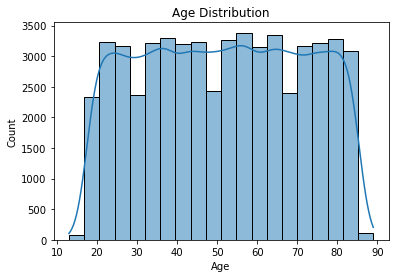

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for Age
sns.histplot(df['Age'], bins = 20, kde = True) # kernel density estimation (KDE)
plt.title('Age Distribution')
plt.show()

**Boxplots:** Identify spread, central tendency, and outliers.


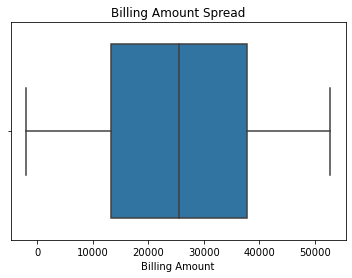

In [32]:
# Boxplot for billing anount
sns.boxplot(x=df['Billing Amount'])
plt.title('Billing Amount Spread')
plt.show()

**Count plots:** Visualize counts (number of occurrences) for categorical variables.

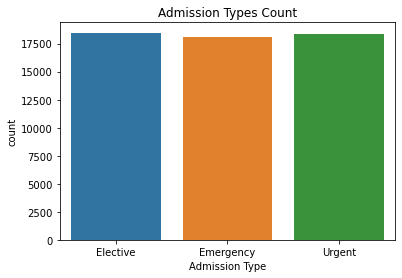

In [33]:
# Count Plot for Admission Type
sns.countplot(x = 'Admission Type', data = df) # for Categorical variables
plt.title('Admission Types Count')
plt.show()

### b) Bivariate Analysis
Bivariate Analysis is the **analysis of two variables simultaneously** to explore the **relationship, association, or correlation** between them and understand how one variable affects or relates to the other.

**Bar plots:** Visualize values (like average, sum) for categorical variables.


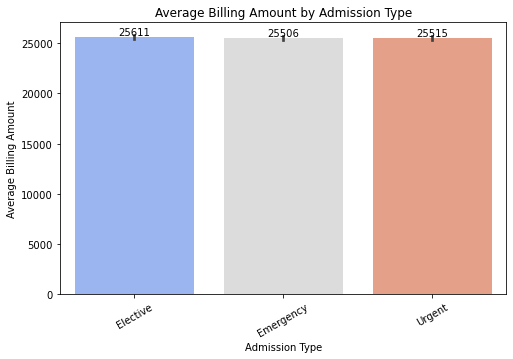

Admission Type
Elective     25610.896999
Emergency    25505.826779
Urgent       25515.068687
Name: Billing Amount, dtype: float64

In [34]:
# Bar Plot for average Billing Amount by Admission Type 
plt.figure(figsize=(8,5))
ax = sns.barplot(x = 'Admission Type', y = 'Billing Amount', data = df, estimator = np.mean, palette = 'coolwarm')

for bar in ax.containers:
    ax.bar_label(bar, fmt='%.0f', label_type='edge', fontsize=10)

plt.title('Average Billing Amount by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Average Billing Amount')
plt.xticks(rotation=30)
plt.show()

df.groupby('Admission Type')['Billing Amount'].mean()

**Scatter Plot:** Shows the relationship between two continuous variables. Each point represents an observation.

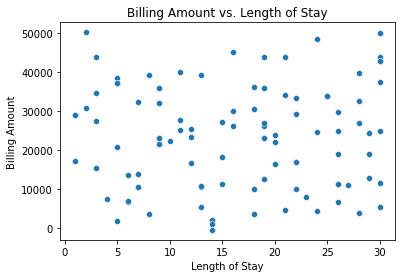

In [35]:
# Scatter Plot: Billing Amount vs. Length of Stay
sns.scatterplot(x = 'Length of Stay', y = 'Billing Amount', data = df.head(100))
plt.title('Billing Amount vs. Length of Stay')
plt.show()

**Heatmap:** It uses color gradients to represent **the magnitude or intensity of values in a two-dimensional matrix.**
It helps quickly identify patterns, correlations, outliers, and areas of high or low concentration within large datasets.

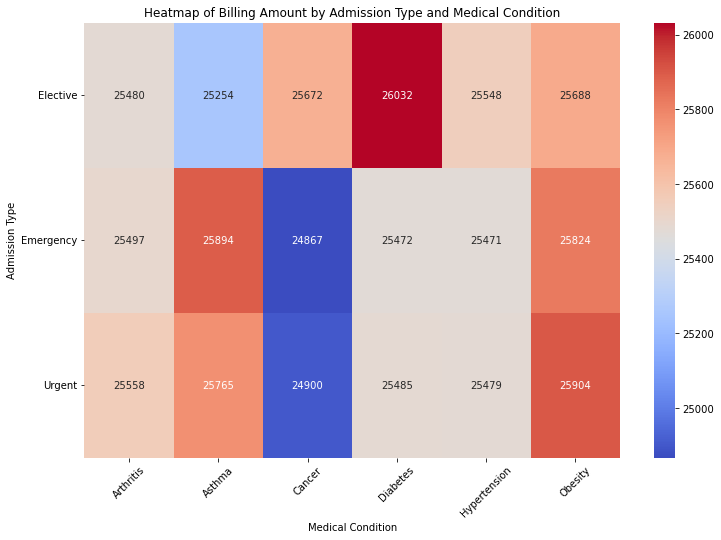

In [36]:
pivot_table = df.pivot_table(
    index='Admission Type',      
    columns='Medical Condition', 
    values='Billing Amount',      
    aggfunc='mean'                
)

# Step 2: Plot Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.0f')
plt.title('Heatmap of Billing Amount by Admission Type and Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Admission Type')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


**Box Plot:** Compares the distribution of a continuous variable across different categories **(categorical vs continuous).**

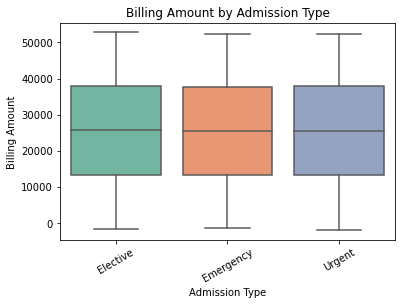

In [37]:
# Box Plot: Billing Amount across Admission Types
sns.boxplot(x='Admission Type', y='Billing Amount', data=df, palette='Set2')
plt.title('Billing Amount by Admission Type')
plt.xticks(rotation=30)
plt.show()


**Line Plot:** Shows the trend or **relationship between two continuous variables, often across time.**


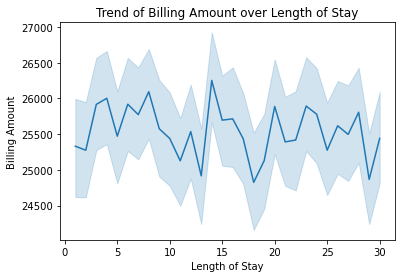

In [38]:
# Line Plot: Length of Stay vs. Billing Amount
sns.lineplot(x='Length of Stay', y='Billing Amount', data = df)
plt.title('Trend of Billing Amount over Length of Stay')
plt.show()


### c) Multivariate Analysis
Multivariate Analysis is the **analysis of more than two variables simultaneously** to understand complex relationships, interactions, and combined effects among multiple variables within a dataset.



**Grouped Boxplots:** Compare distributions within categories.

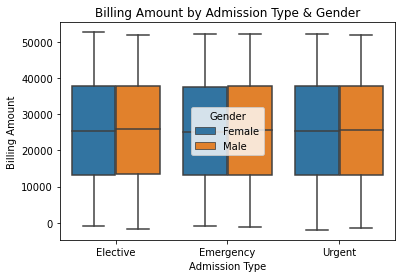

In [39]:
sns.boxplot(x='Admission Type', y='Billing Amount', hue='Gender', data=df)
plt.title('Billing Amount by Admission Type & Gender')
plt.show()

**Pairplots:** Multiple scatter plots combined for selected variables.

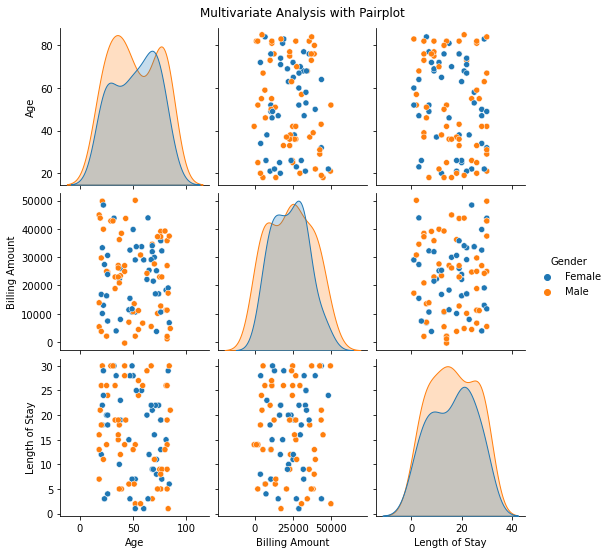

In [40]:
sns.pairplot(df.head(100), vars=['Age', 'Billing Amount', 'Length of Stay'], hue='Gender')
plt.suptitle('Multivariate Analysis with Pairplot', y=1.02) # y=1.02 → Adjusts the vertical position of the title.
plt.show()

**Facet Grids:** Create subplots based on categorical variables.

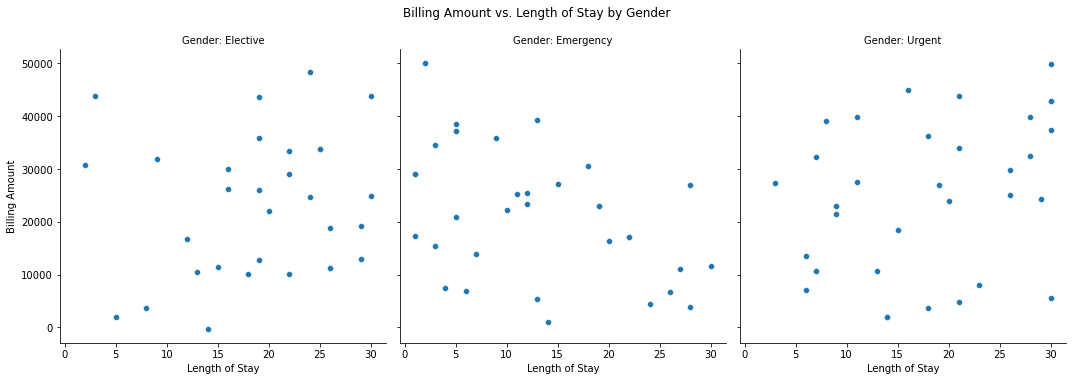

In [41]:
# Create a FacetGrid: Billing Amount vs. Length of Stay, split by Gender
g = sns.FacetGrid(df.head(100), col='Admission Type', height=5, aspect=1)
g.map_dataframe(sns.scatterplot, x='Length of Stay', y='Billing Amount')

g.set_axis_labels('Length of Stay', 'Billing Amount')
g.set_titles('Gender: {col_name}')
g.fig.suptitle('Billing Amount vs. Length of Stay by Gender', y=1.05)
plt.show()


### d) Distribution Plots
Understand data distribution patterns and proportions.

**KDE (Kernel Density Estimation):** Smooth curve showing variable distribution.

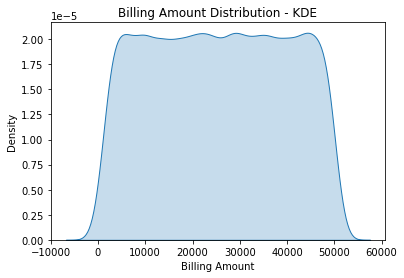

In [42]:
# KDE Plot for Billing Amount
sns.kdeplot(df['Billing Amount'], shade=True)
plt.title('Billing Amount Distribution - KDE')
plt.show()

**Pie charts:** Show percentage share of categories.

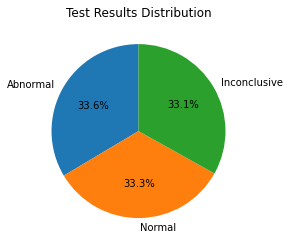

In [43]:
# Pie Chart: Test Results Distribution
df['Test Results'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Test Results Distribution')
plt.ylabel('')
plt.show()

In [44]:
df.columns

Index(['Pid', 'Did', 'Hid', 'Medical Condition', 'Date of Admission',
       'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type',
       'Discharge Date', 'Medication', 'Test Results', 'Name', 'Age', 'Gender',
       'Blood Type', 'Doctor', 'Hospital', 'Length of Stay',
       'Billing Category', 'Admission Type Code'],
      dtype='object')

### e) Correlation Analysis

**Correlation Heatmap:** Show correlation strength between multiple numeric variables

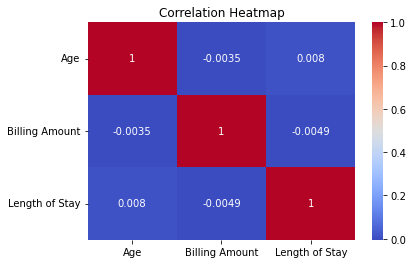

In [45]:
# Correlation Heatmap
corr = df[['Age', 'Billing Amount', 'Length of Stay']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
